<a href="https://colab.research.google.com/github/Carlos-Ruiz-Ed/Regresion_Logistica/blob/main/Act7_Regresi%C3%B3nLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 7: Regresion Logistica**

##Carlos Eduardo Ruiz Benavides
##A01702749

###Importamos librerias y cargamos el archivo

In [35]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [1310]:
#Carga desde un archivo .xlsx sin indice
df_cuentas = pd.read_csv('cuentas_credicel.csv', encoding = 'latin-1', index_col = 0)

<ipython-input-1310-bef08d34f2f7>:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cuentas = pd.read_csv('cuentas_credicel.csv', encoding = 'latin-1', index_col = 0)


In [69]:
df_cuentas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22735 entries, 3 to 22971
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tag                 22735 non-null  object 
 1   folio_solicitud     22735 non-null  int64  
 2   fecha               22735 non-null  object 
 3   marca               22735 non-null  object 
 4   modelo              22735 non-null  object 
 5   plazo               22735 non-null  object 
 6   precio              22735 non-null  float64
 7   enganche            22735 non-null  float64
 8   descuento           22735 non-null  float64
 9   semana              22735 non-null  int64  
 10  monto_financiado    22735 non-null  float64
 11  costo_total         22735 non-null  int64  
 12  monto_accesorios    22735 non-null  float64
 13  agente_venta        22735 non-null  object 
 14  dis_venta           22735 non-null  object 
 15  status              22735 non-null  int64  
 16  frau

In [51]:
df_cuentas.head()

,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,semana,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
folio,,,,,,,,,,,,,,,,,,,,,
3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,81,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,225,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,170,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,178,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


###Eliminacion de nulos

In [1311]:
#Identificar valores nulos por columna
valores_nulos = df_cuentas.isnull().sum()
valores_nulos

tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
puntos                   0
riesgo                   0
score_buro               0
razones_buro          7340
porc_eng                 0
limite_credito           0
semana_actual            0
cp_cliente            7243
edad_cliente             9
cd_cliente               0
edo_cliente              8
cd_venta                 0
edo_venta                0
c

In [1312]:
#Cambiamos los valores 0 de las columnas de texto por valores NaN
columnas = ['cd_cliente', 'edo_cliente','cd_venta', 'edo_venta', 'curp']
df_cuentas[columnas] = df_cuentas[columnas].replace('0', np.nan)

#En las columnas de fechas ponemos una fecha generica
columnas = ['fecha_ultimo_pago', 'fecha_pago_proximo']
df_cuentas[columnas] = df_cuentas[columnas].fillna('01/01/200 00:00')

#Para la columna status cuenta llenamos los valores faltantes con el estatus de Corriente
df_cuentas['status_cuenta'] = df_cuentas['status_cuenta'].fillna('Corriente')

#En el limite de credito primero la convertimos a numerica
df_cuentas['limite_credito'] = pd.to_numeric(df_cuentas['limite_credito'], errors='coerce')


In [1313]:
#Llenamos las columnas faltantes con los metodos mean, bfill y ffill
df_centas = df_cuentas.fillna(round(df_cuentas.mean(),0))
df_cuentas = df_cuentas.fillna(method = 'ffill')
df_cuentas = df_cuentas.fillna(method = 'bfill')

<ipython-input-1313-27b76ab094af>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_centas = df_cuentas.fillna(round(df_cuentas.mean(),0))


In [1314]:
#Identificar valores nulos por columna
valores_nulos=df_cuentas.isnull().sum()
valores_nulos

tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

###Eliminacion de atípicos

<Figure size 1500x800 with 0 Axes>

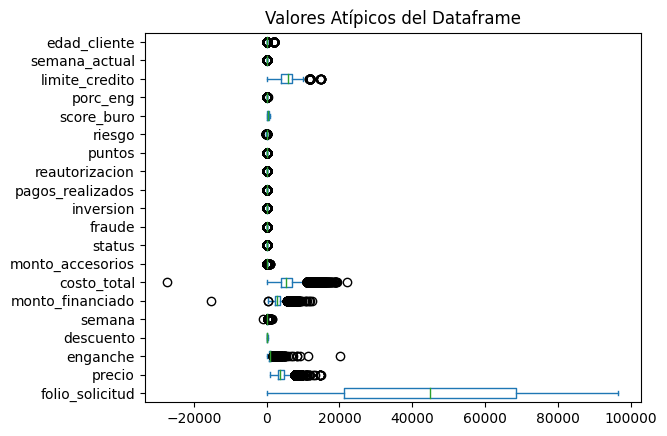

In [1315]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_cuentas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [1316]:
#Los al ser mas las columnas con texto primero se ocupa hacer un dataframe con
#solo las numericas para eliminar outliers ya que si no no funciona el metodo

# Seleccionar columnas de tipo 'object'
df_object = df_cuentas.select_dtypes(include=['object'])

columnas_quitar= df_object.columns.tolist()

# Otro dataframe solo con las numericas
df_num = df_cuentas.drop(columns=columnas_quitar)

In [1317]:
# Seleccionar columnas de boleanas
df_bool = df_num[['fraude', 'reautorizacion', 'inversion']]

columnas_quitar= df_bool.columns.tolist()

#Otro dataframe solo con las numericas
df_num = df_num.drop(columns=columnas_quitar)
df_num

,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,pagos_realizados,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,,,,,,,,,,,,,,,,,
3,30,1949.0,780.0,0.0,81,1169.0,2106,0.0,2,0,0,0.00,0,40.02,5000.0,26,23.0
4,33,2999.0,1050.0,0.0,225,1949.0,2925,0.0,2,0,0,0.00,0,35.01,6000.0,13,60.0
5,37,1959.0,490.0,0.0,170,1469.0,2210,0.0,3,0,0,0.00,0,25.01,0.0,74,58.0
6,38,1959.0,490.0,0.0,170,1469.0,2210,0.0,2,0,0,0.00,0,25.01,7000.0,13,42.0
7,44,4299.0,1075.0,0.0,178,3224.0,6942,0.0,1,0,0,0.00,0,25.01,7000.0,74,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22967,96502,3349.0,297.0,0.0,211,3052.0,5486,0.0,1,0,10,27.40,469,8.87,10000.0,0,22.0
22968,96479,4100.0,1209.0,0.0,200,2891.0,5200,0.0,1,0,9,19.00,502,29.49,5000.0,0,27.0
22969,96442,4849.0,1152.0,0.0,256,3697.0,6656,0.0,1,0,11,26.65,459,23.76,4750.0,0,36.0


In [1318]:
#Definimos los limites con desviación estándar
y=df_num
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()

print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido folio_solicitud     127723.906961
precio                8081.558082
enganche              2356.496845
descuento              478.215020
semana                 541.287392
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
pagos_realizados        39.306132
puntos                  48.354233
riesgo                  58.456322
score_buro            1142.021000
porc_eng                45.711306
limite_credito       12330.037970
semana_actual           64.380898
edad_cliente           422.312919
dtype: float64
Limite inferior permitido folio_solicitud    -36023.715538
precio                -87.484900
enganche             -503.622066
descuento            -321.263535
semana                -65.792692
monto_financiado     -214.044583
costo_total         -1458.203597
monto_accesorios     -164.333344
status                 -0.100423
pagos_realizados      -18.944575
puntos                -20

In [1319]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data2 = df_num[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,pagos_realizados,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,,,,,,,,,,,,,,,,,
3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0.0,0.00,0,40.02,5000.0,26.0,23.0
4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0.0,0.00,0,35.01,6000.0,13.0,60.0
5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,0.0,0.0,0.00,0,25.01,0.0,NaN,58.0
6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0.0,0.00,0,25.01,7000.0,13.0,42.0
7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0.0,0.00,0,25.01,7000.0,NaN,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,10.0,27.40,469,8.87,10000.0,0.0,22.0
22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,9.0,19.00,502,29.49,5000.0,0.0,27.0
22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,11.0,26.65,459,23.76,4750.0,0.0,36.0


In [1320]:
#Corroboramos valores nulos del dataframe3
valores_nulos=data2.isnull().sum()
valores_nulos

folio_solicitud       0
precio              110
enganche            292
descuento            17
semana              362
monto_financiado    182
costo_total         290
monto_accesorios    617
status              154
pagos_realizados    184
puntos                3
riesgo               65
score_buro            0
porc_eng            275
limite_credito        7
semana_actual       178
edad_cliente         99
dtype: int64

In [1321]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
df_mcuentas = data2.copy()
df_mcuentas = df_mcuentas.fillna(round(data2.mean(),1))
df_mcuentas

,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,pagos_realizados,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,,,,,,,,,,,,,,,,,
3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,0.0,0.0,0.00,0,40.02,5000.0,26.0,23.0
4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,0.0,0.0,0.00,0,35.01,6000.0,13.0,60.0
5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,0.0,0.0,0.00,0,25.01,0.0,20.2,58.0
6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,0.0,0.0,0.00,0,25.01,7000.0,13.0,42.0
7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,0.0,0.0,0.00,0,25.01,7000.0,20.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,0.0,10.0,27.40,469,8.87,10000.0,0.0,22.0
22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,0.0,9.0,19.00,502,29.49,5000.0,0.0,27.0
22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,0.0,11.0,26.65,459,23.76,4750.0,0.0,36.0


In [1322]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = df_mcuentas.isnull().sum()
valores_nulos

folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
pagos_realizados    0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
limite_credito      0
semana_actual       0
edad_cliente        0
dtype: int64

In [1323]:
df_cuentas = pd.concat([df_mcuentas, df_object], axis =1)
df_cuentas = pd.concat([df_cuentas, df_bool], axis =1)

## Regresiones Logisticas

In [1324]:
coeficientes = pd.DataFrame(columns=['Modelo', 'Presicion', 'Exactitud', 'Sensibilidad'])

In [1159]:
df_cuentas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22735 entries, 3 to 22971
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio_solicitud     22735 non-null  int64  
 1   precio              22735 non-null  float64
 2   enganche            22735 non-null  float64
 3   descuento           22735 non-null  float64
 4   semana              22735 non-null  float64
 5   monto_financiado    22735 non-null  float64
 6   costo_total         22735 non-null  float64
 7   monto_accesorios    22735 non-null  float64
 8   status              22735 non-null  float64
 9   pagos_realizados    22735 non-null  float64
 10  puntos              22735 non-null  float64
 11  riesgo              22735 non-null  float64
 12  score_buro          22735 non-null  int64  
 13  porc_eng            22735 non-null  float64
 14  limite_credito      22735 non-null  float64
 15  semana_actual       22735 non-null  float64
 16  edad

###Modelo 1

In [1325]:
unico = np.unique(df_cuentas['fraude'])
unico

array([0, 1])

In [1326]:
df_cuentas['fraude']= df_cuentas['fraude'].replace(1, "yes")
df_cuentas['fraude']= df_cuentas['fraude'].replace(0, "no")

In [1327]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['enganche', 'monto_financiado', 'riesgo']]
Var_Dep= df_cuentas['fraude']

In [1328]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1329]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1330]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1331]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1332]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1333]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1334]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[6312    0]
 [ 509    0]]


In [1335]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="no")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.92537751062894


In [1336]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.92537751062894


In [1337]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [1338]:
coeficientes.loc[0] = ['Modelo 1', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 2

In [1340]:
unico = np.unique(df_cuentas['reautorizacion'])
unico

array([0, 1])

In [1341]:
df_cuentas['reautorizacion']= df_cuentas['reautorizacion'].replace(1, "yes")
df_cuentas['reautorizacion']= df_cuentas['reautorizacion'].replace(0, "no")

In [1342]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['porc_eng', 'precio', 'costo_total']]
Var_Dep= df_cuentas['reautorizacion']

In [1343]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1344]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1345]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1346]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1347]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1348]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1349]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[6592    0]
 [ 229    0]]


In [1350]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="no")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9664272100864976


In [1351]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9664272100864976


In [1352]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [1353]:
coeficientes.loc[1] = ['Modelo 2', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 3

In [1355]:
unico = np.unique(df_cuentas['inversion'])
unico

array([0, 1])

In [1356]:
df_cuentas['inversion']= df_cuentas['inversion'].replace(1, "yes")
df_cuentas['inversion']= df_cuentas['inversion'].replace(0, "no")

In [1357]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['porc_eng', 'precio', 'costo_total']]
Var_Dep= df_cuentas['inversion']

In [1358]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1359]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1360]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1361]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1362]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1363]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1364]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5244    0]
 [1577    0]]


In [1365]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="no")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7688022284122563


In [1366]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7688022284122563


In [1367]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [1368]:
coeficientes.loc[2] = ['Modelo 3', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 4

In [1370]:
unico = df_cuentas['plazo'].unique()
unico

array(['26S', '13S', '39S', '52S'], dtype=object)

In [1371]:
#Convierto una variable a dicotómica
df_cuentas['plazo']= df_cuentas['plazo'].replace(["13S", "26S", "39S"], "Menos de un año")
df_cuentas['plazo']= df_cuentas['plazo'].replace("52S", "Un año")

In [1372]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['porc_eng', 'descuento', 'costo_total', 'edad_cliente']]
Var_Dep= df_cuentas['plazo']

In [1373]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1374]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1375]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1376]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1377]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1378]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1379]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[6698    0]
 [ 123    0]]


In [1380]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="Un año")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1381]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.981967453452573


In [1382]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Un año")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [1383]:
coeficientes.loc[3] = ['Modelo 4', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 5

In [1385]:
unico = np.unique(df_cuentas['inversion'])
unico

array(['no', 'yes'], dtype=object)

In [1386]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['enganche', 'monto_financiado', 'riesgo']]
Var_Dep= df_cuentas['inversion']

In [1387]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1388]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1389]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1390]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1391]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1392]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1393]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5181    1]
 [1638    1]]


In [1394]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5


In [1395]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7597126521037971


In [1396]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0006101281269066504


In [1397]:
coeficientes.loc[4] = ['Modelo 5', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 6

In [1399]:
unico = df_cuentas['status_cuenta'].unique()
unico

array(['Corriente', 'Cancelado', 'Mora', 'Fraude', 'Atraso'], dtype=object)

In [1400]:
#Convierto una variable a dicotómica
df_cuentas['status_cuenta']= df_cuentas['status_cuenta'].replace(['Corriente',
      'Mora', 'Fraude', 'Atraso'], "No Cancelado")

In [1401]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['porc_eng', 'pagos_realizados', 'riesgo', 'score_buro']]
Var_Dep= df_cuentas['status_cuenta']

In [1402]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1403]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1404]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1405]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1406]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1407]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1408]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0   44]
 [   0 6777]]


In [1409]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="No Cancelado")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9935493329423838


In [1410]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9935493329423838


In [1411]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="No Cancelado")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


In [1412]:
coeficientes.loc[5] = ['Modelo 6', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 7

In [1414]:
unico = df_cuentas['edad_cliente'].unique()
unico

array([23. , 60. , 58. , 42. , 33. , 38. , 21. , 45. , 36. , 47. , 20. ,
       43. , 46. , 37. , 40. , 55. , 31. , 56. , 52. , 48. , 27. , 18. ,
       25. , 44. , 22. , 28. , 39. , 29. , 26. , 19. , 34. , 24. , 54. ,
       32. , 30. , 35. , 49. , 41. , 53. , 66. , 51. , 57. , 63. , 65. ,
       50. , 64. , 73. , 61. , 62. , 70. , 67. , 69. , 59. , 75. , 78. ,
       80. , 76. , 79. , 71. , 68. , 72. , 81. , 83. , 74. , 77. , 35.3,
       87. , 82. , 14. , 86. ])

In [1415]:
#Convierto una variable a dicotómica
df_cuentas['edad_cliente'] = df_cuentas['edad_cliente'].apply(lambda x:
                        'Mayor de 35' if x > 35 else 'Menor de 35')


In [1416]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['precio', 'pagos_realizados', 'porc_eng']]
Var_Dep= df_cuentas['edad_cliente']

In [1417]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1418]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1419]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1420]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1421]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1422]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1423]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 573 2482]
 [ 490 3276]]


In [1424]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="Mayor de 35")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5390404515522107


In [1425]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5642867614719249


In [1426]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Mayor de 35")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.18756137479541735


In [1427]:
coeficientes.loc[6] = ['Modelo 7', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 8

In [1429]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['descuento', 'limite_credito', 'riesgo', 'pagos_realizados'
, 'precio', 'semana', 'status']]
Var_Dep= df_cuentas['inversion']

In [1430]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1431]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1432]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1433]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1434]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1435]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1436]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5001  232]
 [1359  229]]


In [1437]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.4967462039045553


In [1438]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7667497434393784


In [1439]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.1442065491183879


In [1440]:
coeficientes.loc[7] = ['Modelo 8', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 9

In [1498]:
unico = df_cuentas['descuento'].unique()
unico

array([  0. , 400. , 300. ,  78.2, 200. , 100. , 250. ,  98.5, 199. ,
       229. , 245. , 166. , 212. , 191. , 201.5, 181.5, 195.5, 228.5,
       121. , 159. , 169.5, 175.5, 186. , 160. , 119.5, 167. ])

In [1499]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['semana', 'status', 'pagos_realizados', 'limite_credito']]
Var_Dep= df_cuentas['edad_cliente']

In [1500]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1501]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1502]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1503]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1504]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1505]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1506]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 871 2154]
 [ 769 3027]]


In [1507]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="Mayor de 35")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5310975609756098


In [1508]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5714704588769975


In [1509]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="Mayor de 35")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.28793388429752065


In [1510]:
coeficientes.loc[8] = ['Modelo 9', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

###Modelo 10

In [1512]:
unico = np.unique(df_cuentas['fraude'])
unico

array(['no', 'yes'], dtype=object)

In [1513]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df_cuentas[['semana', 'limite_credito', 'pagos_realizados', 'score_buro',
                        'porc_eng']]
Var_Dep= df_cuentas['fraude']

In [1514]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [1515]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [1516]:
#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [1517]:
#Definimos el algoritmo a utilizar
algoritmo = LogisticRegression()

In [1518]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [1519]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)

In [1520]:
#Verifico la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[6309    1]
 [ 511    0]]


In [1521]:
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.0


In [1522]:
#Calculo la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9249376924204662


In [1523]:
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [1524]:
coeficientes.loc[9] = ['Modelo 10', round(precision,2), round(exactitud,2), round(sensibilidad,2)]

##Tabla de coeficientes

In [1511]:
coeficientes

,Modelo,Presicion,Exactitud,Sensibilidad
0,Modelo 1,0.93,0.93,0.00
1,Modelo 2,0.97,0.97,0.00
2,Modelo 3,0.77,0.77,0.00
3,Modelo 4,0.00,0.98,0.00
4,Modelo 5,0.50,0.76,0.00
5,Modelo 6,0.99,0.99,1.00
6,Modelo 7,0.54,0.56,0.19
7,Modelo 8,0.50,0.77,0.14
8,Modelo 9,0.53,0.57,0.29
9,Modelo 10,0.00,0.92,0.00


In [1070]:
#Cracion de CSV con el df1
coeficientes.to_csv("coeficientes.csv")